In [1]:
# !uv pip install opencv-python matplotlib scipy

Using Python 3.10.12 environment at: PyTorch
Resolved 13 packages in 692ms                                        
Prepared 1 package in 25.94s                                             
Installed 1 package in 9ms.0.86                             
 + opencv-python==4.11.0.86


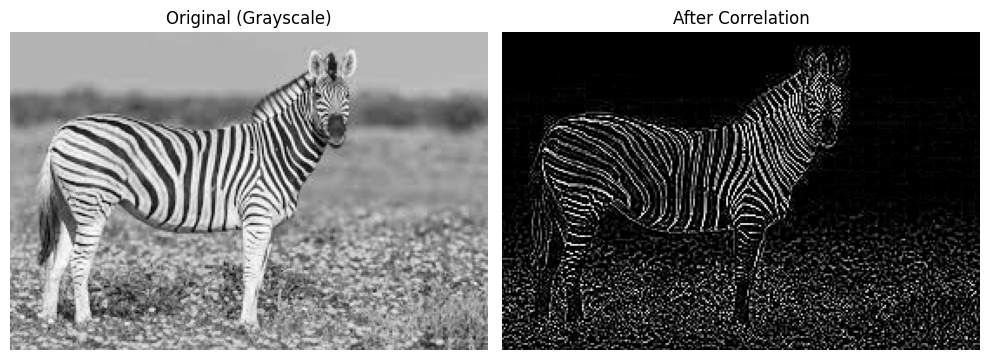

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# 1. Load the image and convert to grayscale
image = cv2.imread('/home/ml02/Downloads/zebra.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. Define a random 3x3 kernel (no flipping, because it's correlation)
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])  # This is a Laplacian-like kernel to detect edges

# 3. Apply 2D correlation (no flip)
output = correlate2d(image, kernel, mode='same', boundary='symm')

# 4. Normalize output to [0, 255] and convert to uint8 for visualization
output = np.clip(output, 0, 255).astype(np.uint8)

# 5. Visualize using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original (Grayscale)")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Correlation")
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


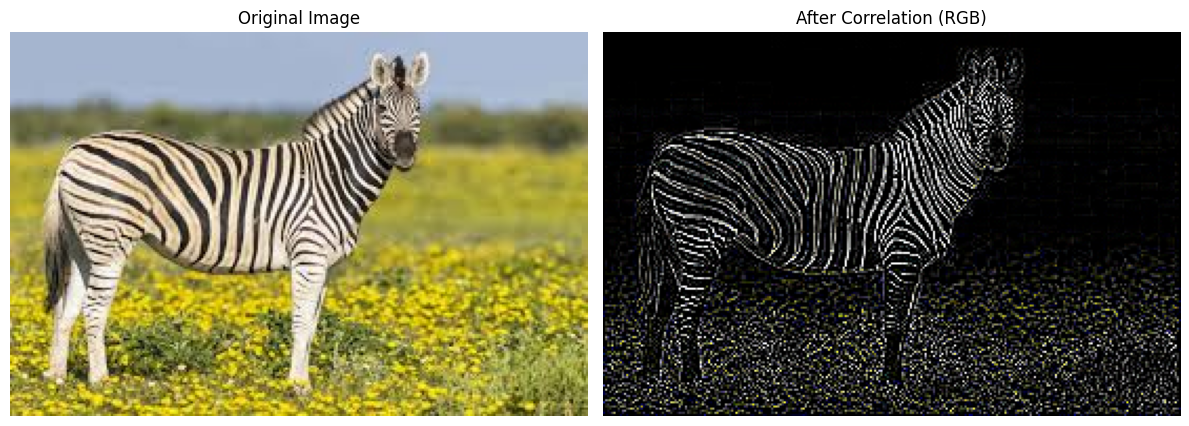

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# 1. Load the image in color (BGR format)
image_bgr = cv2.imread('/home/ml02/Downloads/zebra.jpeg')

# 2. Convert BGR to RGB (for proper display with matplotlib)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 3. Define a 3x3 kernel (example: edge detector or random)
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

# 4. Apply correlation separately to each RGB channel
output_rgb = np.zeros_like(image_rgb)

for i in range(3):  # R, G, B channels
    channel = image_rgb[:, :, i]
    filtered = correlate2d(channel, kernel, mode='same')
    output_rgb[:, :, i] = np.clip(filtered, 0, 255)

output_rgb = output_rgb.astype(np.uint8)

# 5. Display original and result side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Correlation (RGB)")
plt.imshow(output_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


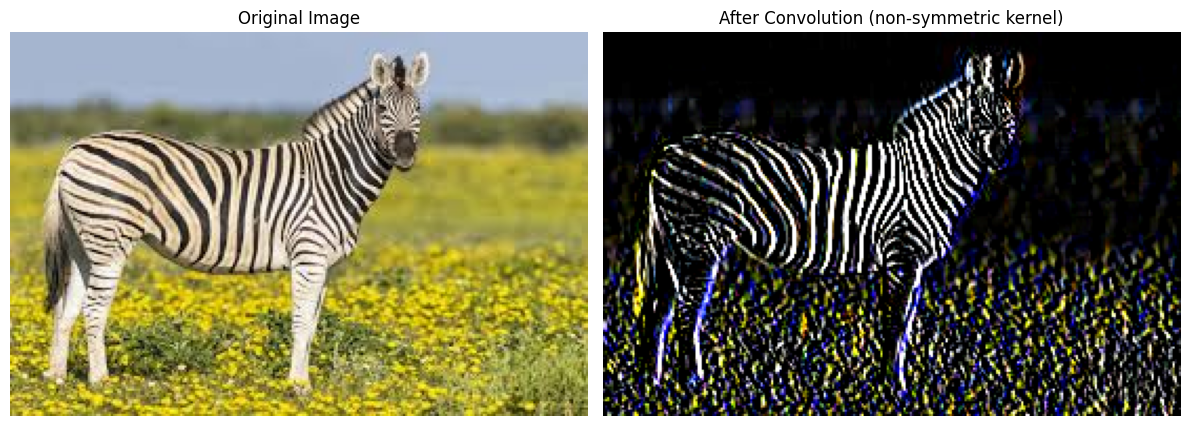

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 1. Load the image in color
image_bgr = cv2.imread('/home/ml02/Downloads/zebra.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 2. Define a non-symmetric 3x3 kernel (e.g., detect diagonal edges)
kernel = np.array([
    [2, 0, -1],
    [1, 0, -2],
    [0, 1, -1]
], dtype=np.float32)

# 3. Flip the kernel for true convolution (180 degrees)
kernel_flipped = np.flip(kernel)

# 4. Apply convolution on each color channel
output_rgb = np.zeros_like(image_rgb)

for i in range(3):  # R, G, B channels
    channel = image_rgb[:, :, i]
    convolved = convolve2d(channel, kernel_flipped, mode='same', boundary='symm')
    output_rgb[:, :, i] = np.clip(convolved, 0, 255)

output_rgb = output_rgb.astype(np.uint8)

# 5. Display the result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Convolution (non-symmetric kernel)")
plt.imshow(output_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


[[4.99632095 9.60571445]
 [7.85595153 6.78926787]]


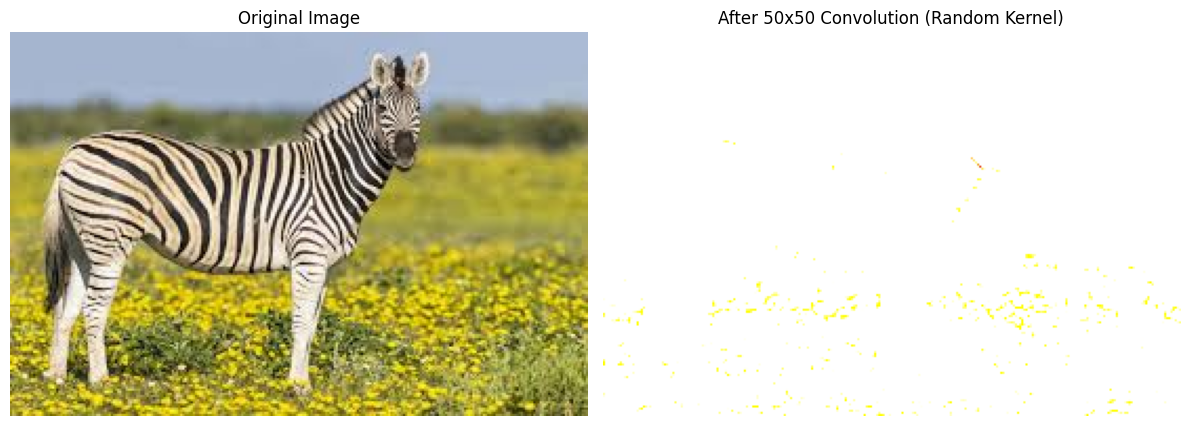

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 1. Load image in color (BGR), convert to RGB
image_bgr = cv2.imread('/home/ml02/Downloads/zebra.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 2. Generate a random 50x50 kernel (e.g., normal distribution)
np.random.seed(42)  # For reproducibility
kernel = np.random.uniform(2, 10, size=(2, 2))
print(kernel)
# 3. Flip the kernel for convolution (180 degrees)
kernel_flipped = np.flip(kernel)

# 4. Prepare output
output_rgb = np.zeros_like(image_rgb)

# 5. Apply convolution per channel
for i in range(3):  # For R, G, B
    channel = image_rgb[:, :, i]
    convolved = convolve2d(channel, kernel_flipped, mode='same')
    output_rgb[:, :, i] = np.clip(convolved, 0, 255)

output_rgb = output_rgb.astype(np.uint8)

# 6. Show the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After 50x50 Convolution (Random Kernel)")
plt.imshow(output_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


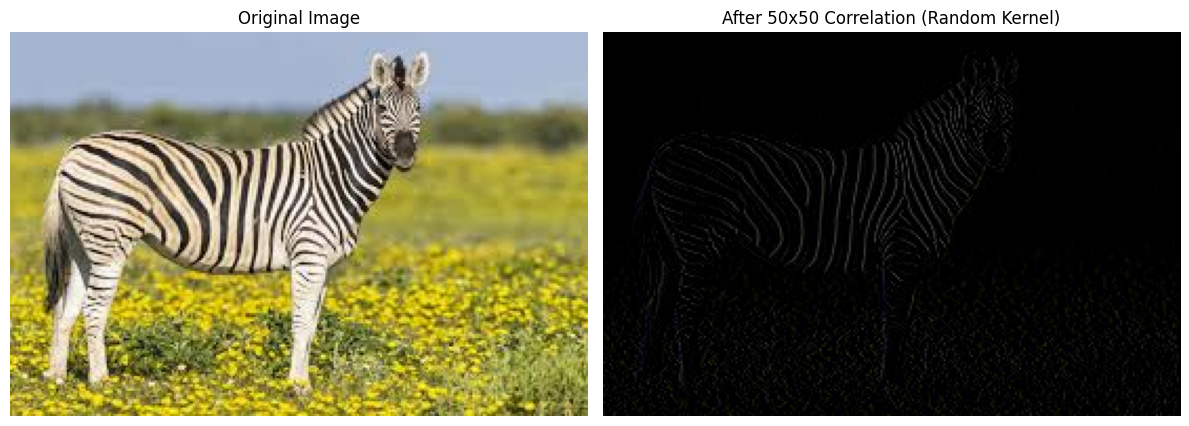

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# 1. Load image in color (BGR), convert to RGB
image_bgr = cv2.imread('/home/ml02/Downloads/zebra.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 2. Generate a random 50x50 kernel (non-symmetric allowed)
np.random.seed(42)  # For reproducibility
kernel = np.random.uniform(2, 10, size=(2, 2))

# Optional: normalize kernel to prevent intensity explosion
kernel -= kernel.mean()
kernel /= np.sum(np.abs(kernel))

# 3. Apply correlation to each RGB channel
output_rgb = np.zeros_like(image_rgb)

for i in range(3):  # R, G, B channels
    channel = image_rgb[:, :, i]
    correlated = correlate2d(channel, kernel, mode='same')
    output_rgb[:, :, i] = np.clip(correlated, 0, 255)

output_rgb = output_rgb.astype(np.uint8)

# 4. Display original and result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After 50x50 Correlation (Random Kernel)")
plt.imshow(output_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
